In [1]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

In [2]:
def highlight(R, T, I, use_max=True):
    """
    Finds the location of maximum (or minimum) matching response, and 
    draws a rectangle on the image around this location.  The
    size of the rectangle is determined by template T.
    
    Returns an image with the drawn rectangle.  Also returns the loc and
    the value (maximum or minimum as the case may be).  The original image
    remains unchanged.
    """
    
    W, H = I.shape[0], I.shape[1]
    w, h = T.shape[0], T.shape[1]
    wr, hg = R.shape[0], R.shape[1]
        
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(R)
    loc = max_loc if use_max else min_loc
    val = max_val if use_max else min_val
    
    loc1 = loc + np.array([h//2, w//2])               # Size of R is different from I 
    tl = loc1 - np.array([h//2, w//2])
    br = loc1 + np.array([h//2, w//2])
    I_ = np.copy(I)
    c = (1.0, 0, 0) if I_.dtype == 'float32' else (255, 0, 0)
    cv.rectangle(I_, tuple(tl), tuple(br), c, 4)
    return I_, loc, val

### The following code can be used draw a rect (of the size of the template) around a location in the image.

In [3]:
def draw_rect(I, bbox):

    I_ = np.copy(I)
    c = (1.0, 0, 0) if I_.dtype == 'float32' else (255, 0, 0)
    cv.rectangle(I_, bbox, c, 4)
    return I_

### Code for making square images (to help with Gaussian pyramid generation)

In [4]:
def make_square(I):
    h = I.shape[0]
    w = I.shape[1]
    
    n_levels = np.int(np.ceil(np.log(np.max([h,w]))/np.log(2)))
    new_h = np.power(2, n_levels)
    new_w = new_h
    
    if len(I.shape) == 3:
        tmp = np.zeros([new_h, new_w, I.shape[2]], dtype=I.dtype)
        tmp[:h,:w,:] = I
    else:
        tmp = np.zeros([new_h, new_w], dtype=I.dtype)
        tmp[:h,:w] = I

    return tmp, n_levels

### Code for making Gaussian Pyramid

In [5]:
def gen_gaussian_pyramid(I, levels):
    G = I.copy()
    gpI = [G]
    for i in range(levels):
        G = cv.pyrDown(G)
        gpI.append(G)
    return gpI

In [6]:
def gen_down_sample(I, levels=6):
    G = I.copy()
    pI = [G]
    for i in range(levels):
        G = G[::2,::2,:]
        pI.append(G)
    return pI

In [7]:
def visualize_guassian_pyramid(gpI):
    I = gpI[0]
    h, w = I.shape[0], I.shape[1]
    
    if len(I.shape) == 3:
        result = np.empty([h, 2*w, I.shape[2]], dtype=I.dtype)
    else:
        result = np.empty([h, 2*w], dtype=I.dtype)
    
    x = 0
    for I_ in gpI:
        if len(I.shape) == 3:
            h, w, _ = I_.shape
            result[:h,x:x+w,:] = I_
        else:
            h, w = I_.shape
            result[:h,x:x+w] = I_
        x += w
    
    return result

In [8]:
def cover_match(orig_img, bbox):
    new_img = np.copy(orig_img)
    ept_list = np.array([0,0,0], dtype=np.float32)
    # for y in range(bbox[0], bbox[0] + bbox[2]):
    #     for x in range(bbox[1], bbox[1] + bbox[3]):
    #         new_img[x][y] = ept_list
    for y in range(0, bbox[0] + bbox[2]):
        for x in range(0, bbox[1] + bbox[3]):
            new_img[x][y] = ept_list

    return new_img

(1964, 3024, 3)


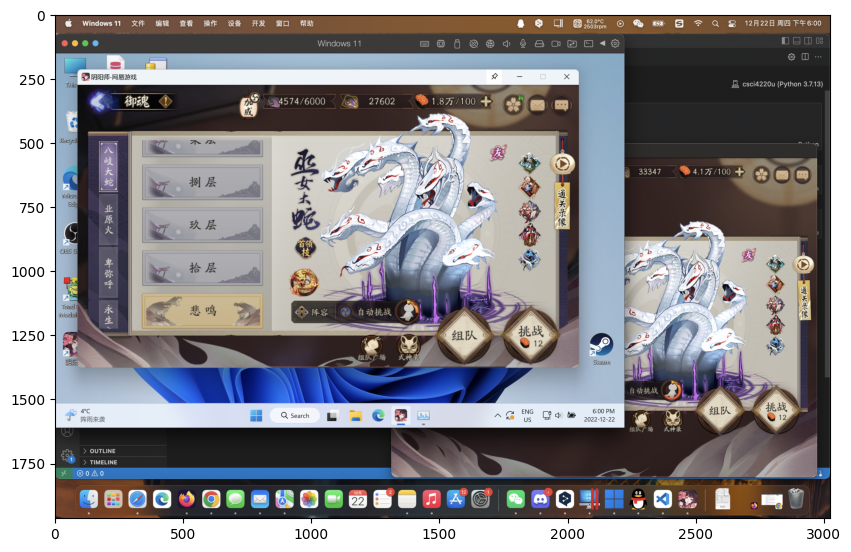

In [9]:
img_dual = cv.imread("pics/01-dual.png")
img_dual = cv.cvtColor(img_dual, cv.COLOR_BGR2RGB)


plt.figure(figsize=(10,10))
plt.imshow(img_dual)
print(img_dual.shape)

(256, 256, 3)


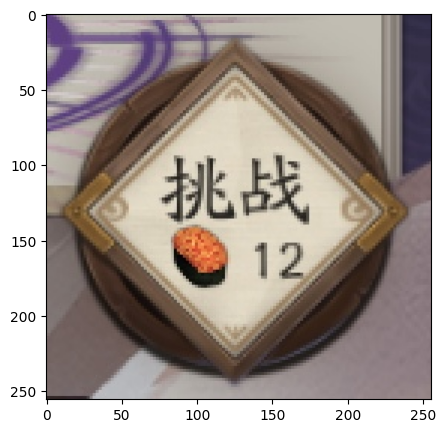

In [10]:
img_T = cv.imread("pics/02-T.jpg")
img_T = cv.cvtColor(img_T, cv.COLOR_BGR2RGB)
img_T = img_T[0:256, 0:256, :]

plt.figure(figsize=(5,5))
plt.imshow(img_T)
print(img_T.shape)

/opt/anaconda3/envs/csci4220u/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


8


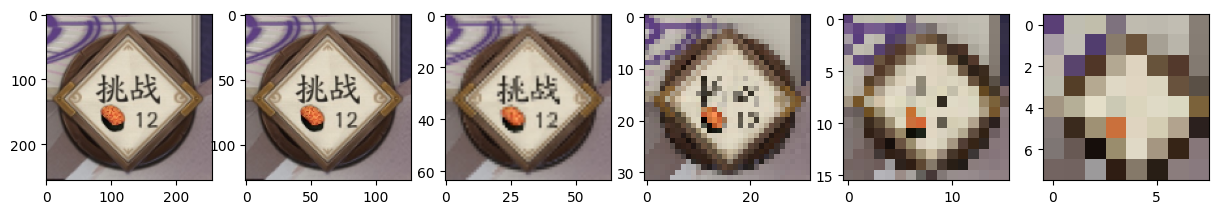

In [12]:
squared_temp, levels = make_square(img_T)
print(levels)
down_sample = gen_down_sample(squared_temp, levels-3)
fig, axs = plt.subplots(1, len(down_sample), figsize=(15,5))
for idx, ax in enumerate(axs):
    # ax.set_xticks([])
    # ax.set_yticks([])
    ax.imshow(down_sample[idx],cmap="gray")

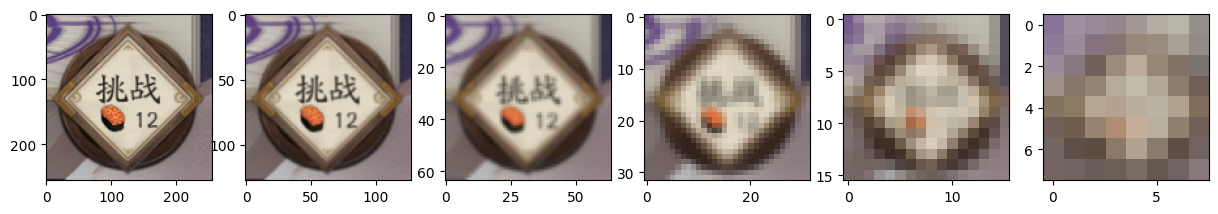

In [13]:
# squared_temp, levels = make_square(img_T)
# print(levels)
gpt = gen_gaussian_pyramid(squared_temp,levels-3)
fig, axs = plt.subplots(1, len(gpt), figsize=(15,5))
for idx, ax in enumerate(axs):
    # ax.set_xticks([])
    # ax.set_yticks([])
    ax.imshow(gpt[idx],cmap="gray")

/opt/anaconda3/envs/csci4220u/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


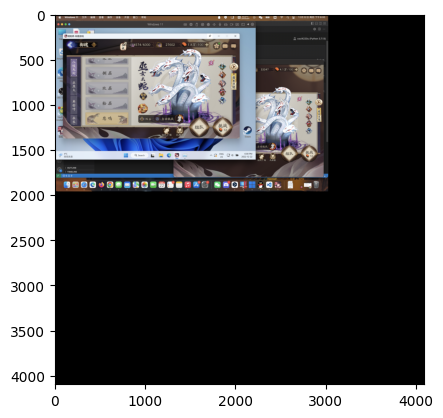

In [14]:
img_dual_squared, n_levels = make_square(img_dual)
plt.imshow(img_dual_squared)

In [15]:
methods = ['cv.TM_CCOEFF', 
        'cv.TM_CCOEFF_NORMED', 
        'cv.TM_CCORR',
        'cv.TM_CCORR_NORMED', 
        'cv.TM_SQDIFF', 
        'cv.TM_SQDIFF_NORMED']

In [18]:
orig_img_copy = np.copy(img_dual)
template = np.copy(img_T)

In [33]:
squared_img, n_levels = make_square(orig_img_copy)
gpI = gen_gaussian_pyramid(squared_img, n_levels)
ds_temp = gen_down_sample(squared_temp, levels-3)
print(len(ds_temp))


6


/opt/anaconda3/envs/csci4220u/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [30]:
# index = 2
# sq_t, l = make_square(ds_temp[index])

/opt/anaconda3/envs/csci4220u/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


/opt/anaconda3/envs/csci4220u/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


[   0.99981618 1731.         1120.        ]
[1731 1120  256  256]
[  0.99844831 865.         560.        ]
[1730 1120  128  128]
[  0.99944842 433.         280.        ]
[1732 1120   64   64]
[  0.99803782 216.         140.        ]
[1728 1120   32   32]
[  0.99896884 108.          70.        ]
[1728 1120   16   16]
[ 0.99928522 54.         35.        ]
[1728 1120    8    8]
[ 0.9975754 27.        18.       ]
[1728 1152    4    4]


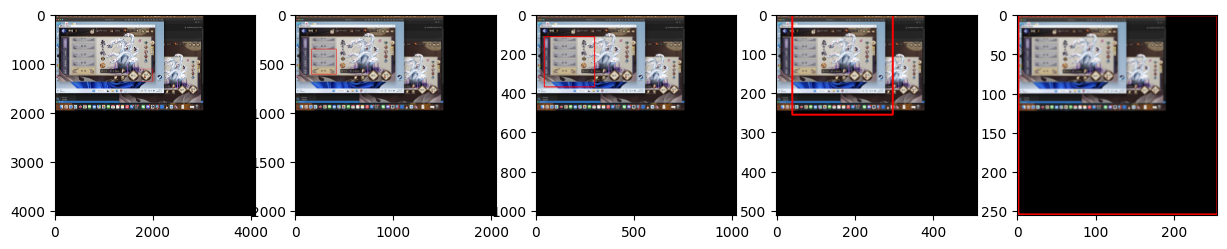

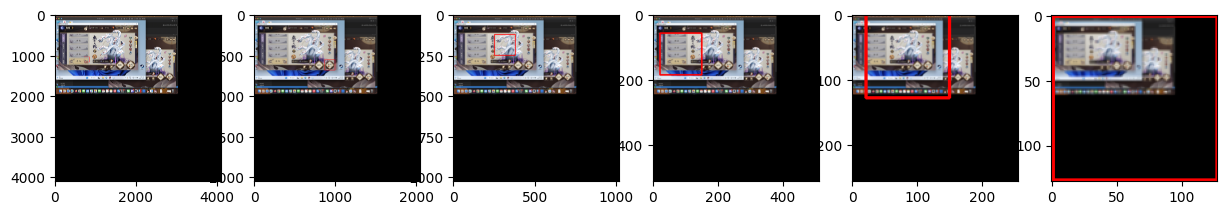

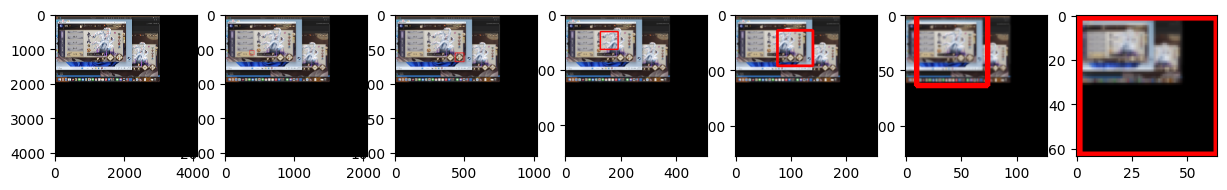

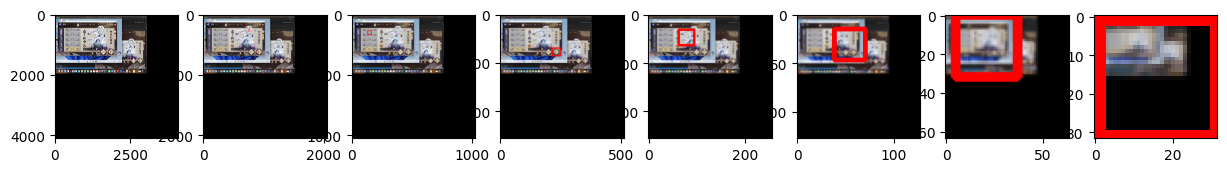

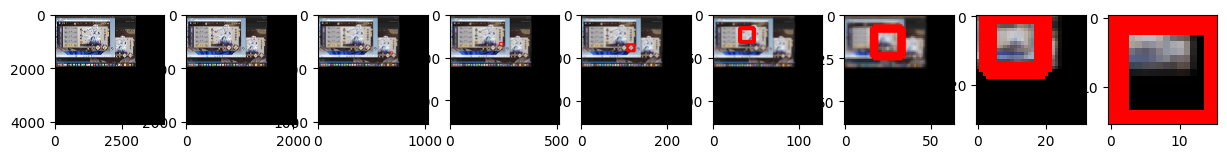

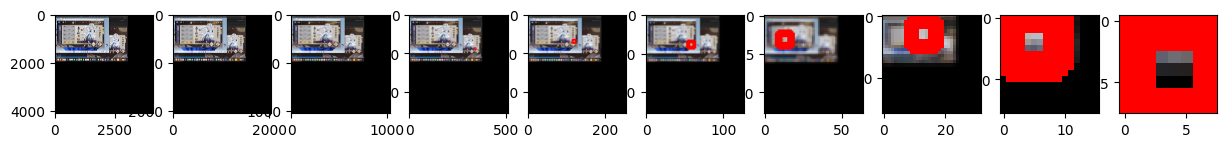

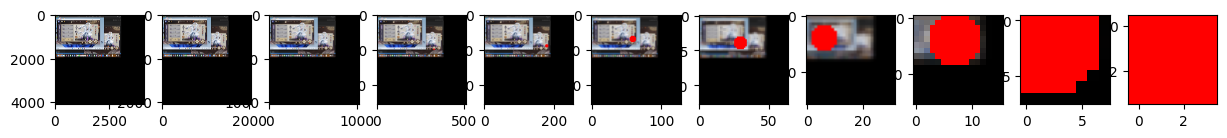

In [35]:
index = 0
sq_t, l = make_square(ds_temp[index])
gpt = gen_gaussian_pyramid(sq_t, l-2)


for template in gpt:
    useful_match = []
    for item in gpI:
        if template.shape[0] <= item.shape[0] and template.shape[1] <= item.shape[1]:
            R_ = cv.matchTemplate(template, item, eval(methods[3]))
            useful_match.append(R_)

    # print(useful_match)
    R_val = np.empty([len(useful_match), 3])
    # print(R_val)
    highlighted_list = []
    for i in range(len(useful_match)):
        R_ = useful_match[i]
        T_ = template
        I_ = gpI[i]

        H_, loc, val = highlight(R_, T_, I_)
        highlighted_list.append(H_)

        R_val[i, : ] = np.array([val, loc[0], loc[1]])

    np.set_printoptions(suppress=True)
    # print(R_val)

    highest_match_pos = 0
    for index in range(0, len(R_val)):
        # print(R_val[index])
        if R_val[index][0] > R_val[highest_match_pos][0]:
            highest_match_pos = index
    # print(highest_match_pos)

    highest_match_box = R_val[highest_match_pos]
    print(highest_match_box)

    highest_match_box[1] = highest_match_box[1] * np.power(2, highest_match_pos)
    highest_match_box[2] = highest_match_box[2] * np.power(2, highest_match_pos)
    # print(highest_match_box)


    match_box = np.array([highest_match_box[1], highest_match_box[2], template.shape[0], template.shape[1]], dtype=np.int32)
    print(match_box)

    fig, axs = plt.subplots(1, len(highlighted_list), figsize=(15,5))
    for idx, ax in enumerate(axs):
        # ax.set_xticks([])
        # ax.set_yticks([])
        ax.imshow(highlighted_list[idx],cmap="gray")





/opt/anaconda3/envs/csci4220u/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


[   0.99981618 1731.         1120.        ]
[1731 1120  256  256]
[  0.99844831 865.         560.        ]
[1730 1120  128  128]
[  0.99944842 433.         280.        ]
[1732 1120   64   64]
[  0.99803782 216.         140.        ]
[1728 1120   32   32]
[  0.99896884 108.          70.        ]
[1728 1120   16   16]
[ 0.99928522 54.         35.        ]
[1728 1120    8    8]
[ 0.9975754 27.        18.       ]
[1728 1152    4    4]


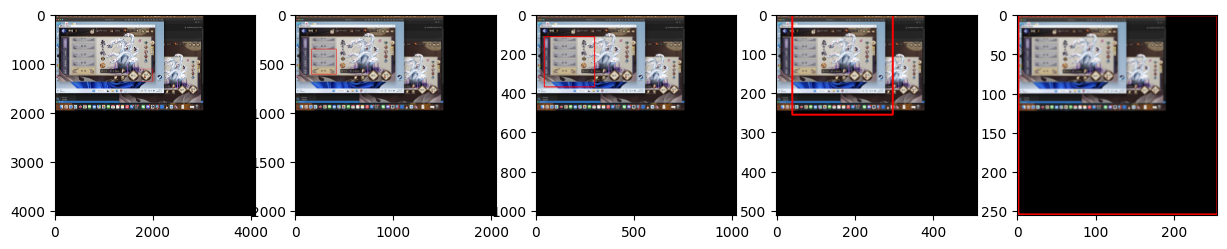

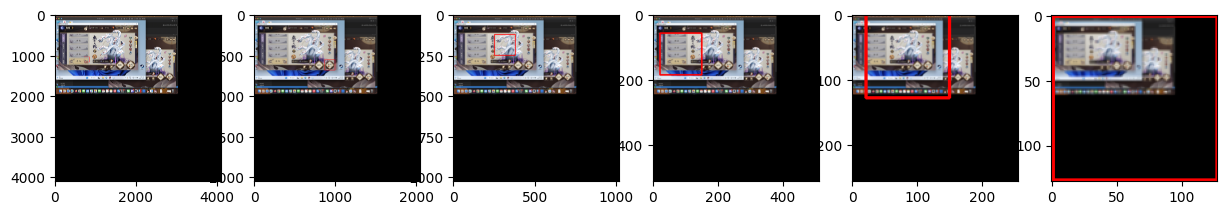

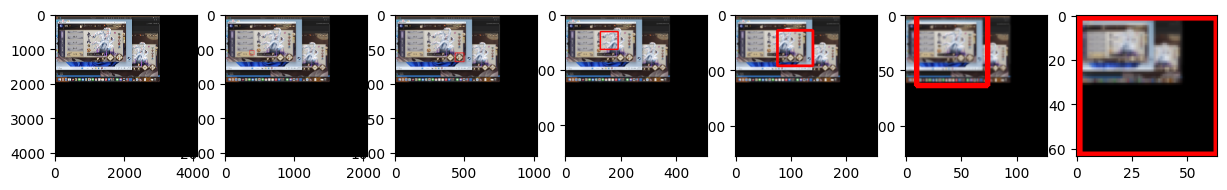

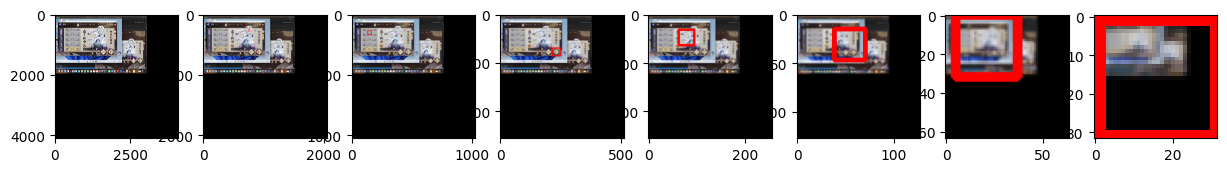

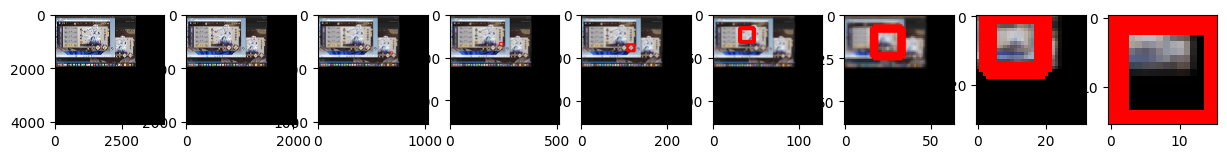

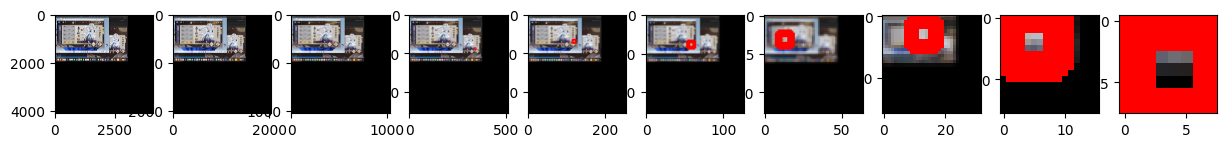

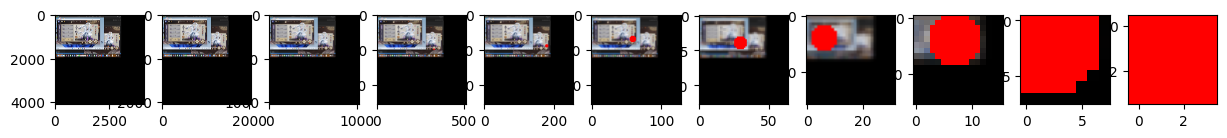

In [37]:
index = 0
sq_t, l = make_square(ds_temp[index])
gpt = gen_gaussian_pyramid(sq_t, l-2)


for template in gpt:
    useful_match = []
    for item in gpI:
        if template.shape[0] <= item.shape[0] and template.shape[1] <= item.shape[1]:
            R_ = cv.matchTemplate(template, item, eval(methods[3]))
            useful_match.append(R_)

    # print(useful_match)
    R_val = np.empty([len(useful_match), 3])
    # print(R_val)
    highlighted_list = []
    for i in range(len(useful_match)):
        R_ = useful_match[i]
        T_ = template
        I_ = gpI[i]

        H_, loc, val = highlight(R_, T_, I_)
        highlighted_list.append(H_)

        R_val[i, : ] = np.array([val, loc[0], loc[1]])

    np.set_printoptions(suppress=True)
    # print(R_val)

    highest_match_pos = 0
    for index in range(0, len(R_val)):
        # print(R_val[index])
        if R_val[index][0] > R_val[highest_match_pos][0]:
            highest_match_pos = index
    # print(highest_match_pos)

    highest_match_box = R_val[highest_match_pos]
    print(highest_match_box)

    highest_match_box[1] = highest_match_box[1] * np.power(2, highest_match_pos)
    highest_match_box[2] = highest_match_box[2] * np.power(2, highest_match_pos)
    # print(highest_match_box)


    match_box = np.array([highest_match_box[1], highest_match_box[2], template.shape[0], template.shape[1]], dtype=np.int32)
    print(match_box)

    fig, axs = plt.subplots(1, len(highlighted_list), figsize=(15,5))
    for idx, ax in enumerate(axs):
        # ax.set_xticks([])
        # ax.set_yticks([])
        ax.imshow(highlighted_list[idx],cmap="gray")



